1) the original noisy data,

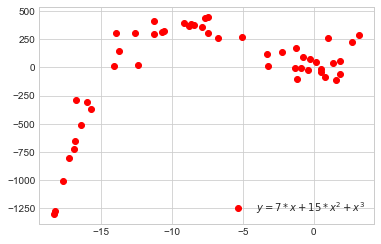

In [2]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 7 * x + 15 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro',label=r'$y = 7 * x + 15 * x^2 + x^3$')
plt.legend(loc='best')

In [11]:
f_1=np.poly1d([7,15,1,0])

2) the polynomial you obtained in Homework #1,

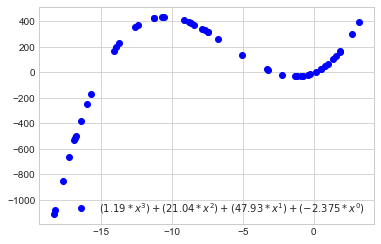

In [5]:
c=[1.19,21.04,47.93,-2.375]
f_2 = np.poly1d(c)
y_2=f_2(x)
plt.plot(x,y_2,'bo',label=r'$(1.19*x^3)+(21.04*x^2)+(47.93*x^1)+(-2.375*x^0)$')
plt.legend(loc='best')
plt.show()


3) the polynomial obtained from this implementation in one figure for comparison.

In [19]:
mutation_rate=0.1
crossover_rate=0.5

In [20]:
from geneticalgorithm import geneticalgorithm as ga

 The best solution found:                                                                           
 [  6.82835403  10.7251013  -20.93956756  19.77080569]

 Objective function:
 54760.7027100167


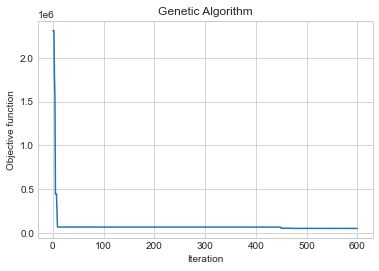

In [21]:
def f_3(X):
    tmp_f=np.poly1d(X)
    badness=((tmp_f(x)-f_1(x))**2).sum()
    return badness


varbound=np.array([[-30,30]]*4)

algorithm_param = {'max_num_iteration': 600,\
                   'population_size':100,\
                   'mutation_probability':mutation_rate,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': crossover_rate,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=f_3,\
            dimension=4,\
            variable_type='real',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()

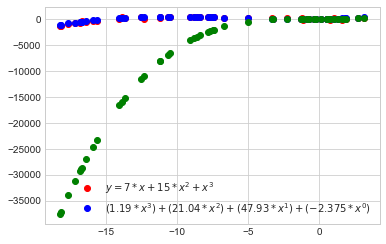

In [22]:
res=model.best_variable
out_f=np.poly1d(res)
plt.plot(x,y,'ro',label=r'$y = 7 * x + 15 * x^2 + x^3$')
plt.plot(x,y_2,'bo',label=r'$(1.19*x^3)+(21.04*x^2)+(47.93*x^1)+(-2.375*x^0)$')
plt.plot(x,out_f(x),'go')
plt.legend(loc='best')
plt.show()

In [18]:
'''
We can see that GA helps us generate the polynomial figure, which is similar with the original one.

However, the original one and the ploynomial figure we obtained looks like a line, as the difference of x and y coordinates unit.
'''

'\nWe can see that GA helps us generate the polynomial figure, which is similar with the original one.\n\nHowever, the original one and the ploynomial figure we obtained looks like a line, as the difference of x and y coordinates unit.\n'